# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Pinterest_1.csv")
df.head()

,userName,score,at,content
0,Nad Lori,5,2024-05-05 03:48:01,Tentang aplikasi ini saya suka sekali karna bi...
1,PUTU RANI,5,2024-05-05 03:43:24,Bagus banget aplikasi ini saya sangat suka
2,Riski Pratama,3,2024-05-05 02:52:15,Apek Joss
3,Evie Ode,5,2024-05-05 02:30:29,Baguss!!! aku ingin mencari Foto Crush ku yait...
4,PUTRA PUTRA,5,2024-05-05 02:24:45,Ini sangat bgus👍


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Tentang aplikasi ini saya suka sekali karna bi...,Nad Lori,2024-05-05 03:48:01
1,Bagus banget aplikasi ini saya sangat suka,PUTU RANI,2024-05-05 03:43:24
2,Apek Joss,Riski Pratama,2024-05-05 02:52:15
3,Baguss!!! aku ingin mencari Foto Crush ku yait...,Evie Ode,2024-05-05 02:30:29
4,Ini sangat bgus👍,PUTRA PUTRA,2024-05-05 02:24:45
...,...,...,...
990,"Masih ada kata""gagal mengunduh""",Muhammad Sultan,2024-04-15 02:18:19
991,Bagus nyaman untuk mencari foto murder drones ...,Yulia Ruwantika,2024-04-15 01:54:42
992,Sangat seru,Wiwi Jayanti,2024-04-15 01:52:17
993,Aplikasi ini bikin saya emosi karena tidak dap...,Dhea Surbakti,2024-04-15 01:14:16


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   995 non-null    object
 1   userName  995 non-null    object
 2   at        995 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,995,995,995
unique,893,995,995
top,Bagus,Nad Lori,2024-05-05 03:48:01
freq,34,1,1


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(995, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(893, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,tentang aplikasi ini saya suka sekali karna bi...,Nad Lori,2024-05-05 03:48:01
1,bagus banget aplikasi ini saya sangat suka,PUTU RANI,2024-05-05 03:43:24
2,apek joss,Riski Pratama,2024-05-05 02:52:15
3,baguss aku ingin mencari foto crush ku yaitu g...,Evie Ode,2024-05-05 02:30:29
4,ini sangat bgus,PUTRA PUTRA,2024-05-05 02:24:45
...,...,...,...
990,masih ada katagagal mengunduh,Muhammad Sultan,2024-04-15 02:18:19
991,bagus nyaman untuk mencari foto murder drones ...,Yulia Ruwantika,2024-04-15 01:54:42
992,sangat seru,Wiwi Jayanti,2024-04-15 01:52:17
993,aplikasi ini bikin saya emosi karena tidak dap...,Dhea Surbakti,2024-04-15 01:14:16


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,tentang aplikasi ini saya suka sekali karna bi...,Nad Lori,2024-05-05 03:48:01
1,bagus banget aplikasi ini saya sangat suka,PUTU RANI,2024-05-05 03:43:24
2,apek joss,Riski Pratama,2024-05-05 02:52:15
3,baguss aku ingin mencari foto crush ku yaitu g...,Evie Ode,2024-05-05 02:30:29
4,ini sangat bgus,PUTRA PUTRA,2024-05-05 02:24:45
...,...,...,...
990,masih ada katagagal mengunduh,Muhammad Sultan,2024-04-15 02:18:19
991,bagus nyaman untuk mencari foto murder drones ...,Yulia Ruwantika,2024-04-15 01:54:42
992,sangat seru,Wiwi Jayanti,2024-04-15 01:52:17
993,aplikasi ini bikin saya emosi karena tidak dap...,Dhea Surbakti,2024-04-15 01:14:16


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi suka sekali karna membantu saya menem...,Nad Lori,2024-05-05 03:48:01
1,bagus banget aplikasi saya sangat suka,PUTU RANI,2024-05-05 03:43:24
2,apek joss,Riski Pratama,2024-05-05 02:52:15
3,baguss aku mencari foto crush ku gilang mama l...,Evie Ode,2024-05-05 02:30:29
4,sangat bgus,PUTRA PUTRA,2024-05-05 02:24:45
...,...,...,...
990,ada katagagal mengunduh,Muhammad Sultan,2024-04-15 02:18:19
991,bagus nyaman mencari foto murder drones ytmci,Yulia Ruwantika,2024-04-15 01:54:42
992,sangat seru,Wiwi Jayanti,2024-04-15 01:52:17
993,aplikasi bikin emosi tidak buat kata sandi nya...,Dhea Surbakti,2024-04-15 01:14:16


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [aplikasi, suka, sekali, karna, membantu, saya...
1          [bagus, banget, aplikasi, saya, sangat, suka]
2                                           [apek, joss]
3      [baguss, aku, mencari, foto, crush, ku, gilang...
4                                         [sangat, bgus]
                             ...                        
990                          [ada, katagagal, mengunduh]
991    [bagus, nyaman, mencari, foto, murder, drones,...
992                                       [sangat, seru]
993    [aplikasi, bikin, emosi, tidak, buat, kata, sa...
994                                 [aplikasinya, bagus]
Name: content, Length: 893, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Pinterest_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Pinterest_1.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi suka sekali karna bantu saya temu fot...
1,bagus banget aplikasi saya sangat suka
2,apek joss
3,baguss aku cari foto crush ku gilang mama lelaa
4,sangat bgus
...,...
888,ada katagagal unduh
889,bagus nyaman cari foto murder drones ytmci
890,sangat seru
891,aplikasi bikin emosi tidak buat kata sandi nya...


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Pinterest_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 7.44MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,aplikasi suka sekali karna bantu saya temu fot...
1,bagus banget aplikasi saya sangat suka
2,apek joss
3,baguss aku cari foto crush ku gilang mama lelaa
4,sangat bgus
...,...
888,ada katagagal unduh
889,bagus nyaman cari foto murder drones ytmci
890,sangat seru
891,aplikasi bikin emosi tidak buat kata sandi nya...


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Pinterest_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Pinterest_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi suka sekali karna bantu saya temu fot...,The app loves to help me find a photo I'm look...
1,1,bagus banget aplikasi saya sangat suka,Very good. My app likes it a lot.
2,2,apek joss,apeek joss
3,3,baguss aku cari foto crush ku gilang mama lelaa,"Good. I'm looking for a picture of my crush, M..."
4,4,sangat bgus,Very good.
...,...,...,...
888,888,ada katagagal unduh,no word failed download
889,889,bagus nyaman cari foto murder drones ytmci,Good. Get yourself a picture of murder drones....
890,890,sangat seru,It's very exciting.
891,891,aplikasi bikin emosi tidak buat kata sandi nya...,The program makes emotion. It doesn't make its...


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Pinterest_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi suka sekali karna bantu saya temu fot...,The app loves to help me find a photo I'm look...
1,1,bagus banget aplikasi saya sangat suka,Very good. My app likes it a lot.
2,2,apek joss,apeek joss
3,3,baguss aku cari foto crush ku gilang mama lelaa,"Good. I'm looking for a picture of my crush, M..."
4,4,sangat bgus,Very good.
...,...,...,...
888,888,ada katagagal unduh,no word failed download
889,889,bagus nyaman cari foto murder drones ytmci,Good. Get yourself a picture of murder drones....
890,890,sangat seru,It's very exciting.
891,891,aplikasi bikin emosi tidak buat kata sandi nya...,The program makes emotion. It doesn't make its...


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 507
Netral = 314
Negatif = 72

Total Data Seluruhnya : 893


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi suka sekali karna bantu saya temu fot...,The app loves to help me find a photo I'm look...,Netral
1,1,bagus banget aplikasi saya sangat suka,Very good. My app likes it a lot.,Positif
2,2,apek joss,apeek joss,Netral
3,3,baguss aku cari foto crush ku gilang mama lelaa,"Good. I'm looking for a picture of my crush, M...",Positif
4,4,sangat bgus,Very good.,Positif
...,...,...,...,...
888,888,ada katagagal unduh,no word failed download,Negatif
889,889,bagus nyaman cari foto murder drones ytmci,Good. Get yourself a picture of murder drones....,Positif
890,890,sangat seru,It's very exciting.,Positif
891,891,aplikasi bikin emosi tidak buat kata sandi nya...,The program makes emotion. It doesn't make its...,Positif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi suka sekali karna bantu saya temu fot...,The app loves to help me find a photo I'm look...,Netral
1,bagus banget aplikasi saya sangat suka,Very good. My app likes it a lot.,Positif
2,apek joss,apeek joss,Netral
3,baguss aku cari foto crush ku gilang mama lelaa,"Good. I'm looking for a picture of my crush, M...",Positif
4,sangat bgus,Very good.,Positif
...,...,...,...
888,ada katagagal unduh,no word failed download,Negatif
889,bagus nyaman cari foto murder drones ytmci,Good. Get yourself a picture of murder drones....,Positif
890,sangat seru,It's very exciting.,Positif
891,aplikasi bikin emosi tidak buat kata sandi nya...,The program makes emotion. It doesn't make its...,Positif


# **Visualisasi**


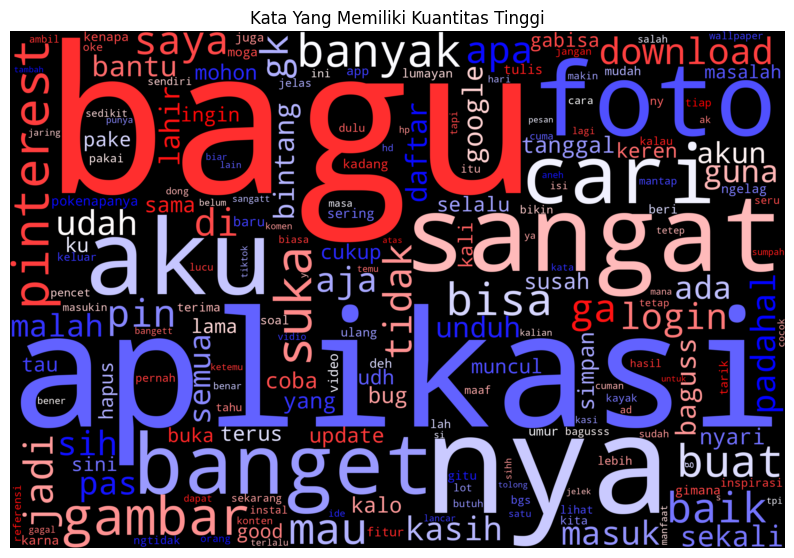

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


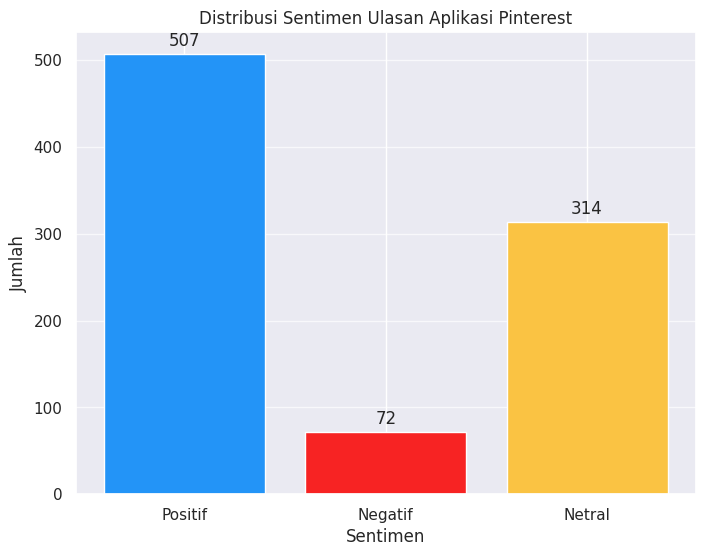

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Pinterest")


In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,bagus banget aplikasi saya sangat suka,Very good. My app likes it a lot.,Positif
3,baguss aku cari foto crush ku gilang mama lelaa,"Good. I'm looking for a picture of my crush, M...",Positif
4,sangat bgus,Very good.,Positif
5,aplikasi nya bagus ada meme sangat lucu bagus ...,"fontcolor="" # FFFF00"" app fontcolor="" # FFFF00...",Positif
7,aplikasi jelek masa pas daftar pake akun googl...,Bad application. When it comes to the Google a...,Negatif
...,...,...,...
888,ada katagagal unduh,no word failed download,Negatif
889,bagus nyaman cari foto murder drones ytmci,Good. Get yourself a picture of murder drones....,Positif
890,sangat seru,It's very exciting.,Positif
891,aplikasi bikin emosi tidak buat kata sandi nya...,The program makes emotion. It doesn't make its...,Positif


In [39]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,bagus banget aplikasi saya sangat suka,Very good. My app likes it a lot.,1
3,baguss aku cari foto crush ku gilang mama lelaa,"Good. I'm looking for a picture of my crush, M...",1
4,sangat bgus,Very good.,1
5,aplikasi nya bagus ada meme sangat lucu bagus ...,"fontcolor="" # FFFF00"" app fontcolor="" # FFFF00...",1
7,aplikasi jelek masa pas daftar pake akun googl...,Bad application. When it comes to the Google a...,0
...,...,...,...
888,ada katagagal unduh,no word failed download,0
889,bagus nyaman cari foto murder drones ytmci,Good. Get yourself a picture of murder drones....,1
890,sangat seru,It's very exciting.,1
891,aplikasi bikin emosi tidak buat kata sandi nya...,The program makes emotion. It doesn't make its...,1


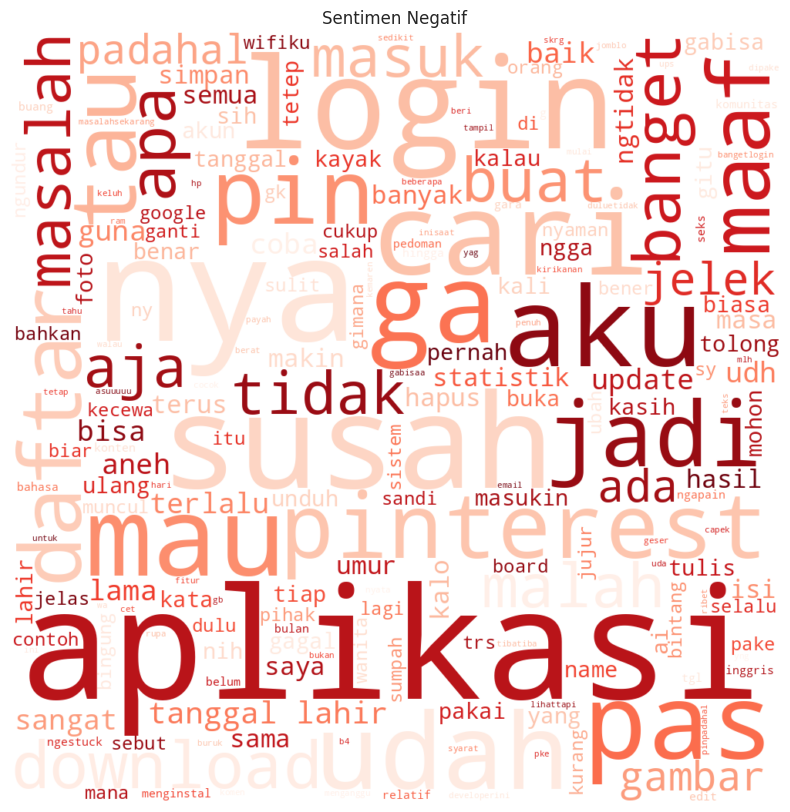

In [40]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

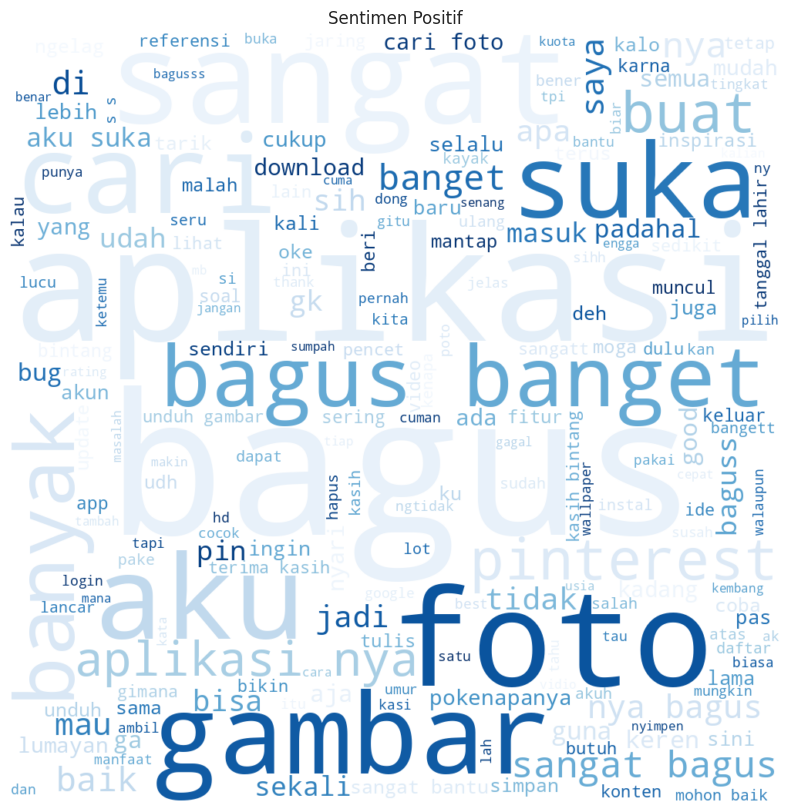

In [41]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [42]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    507
0     72
Name: count, dtype: int64

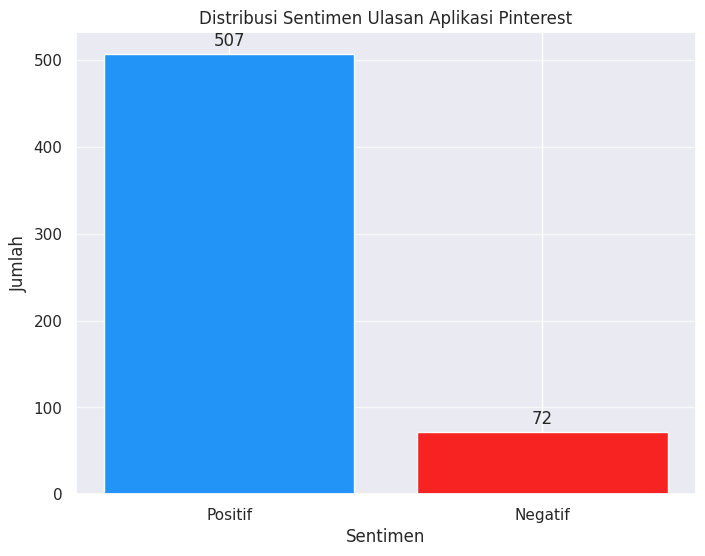

In [44]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Pinterest")

# **Data Preparation**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

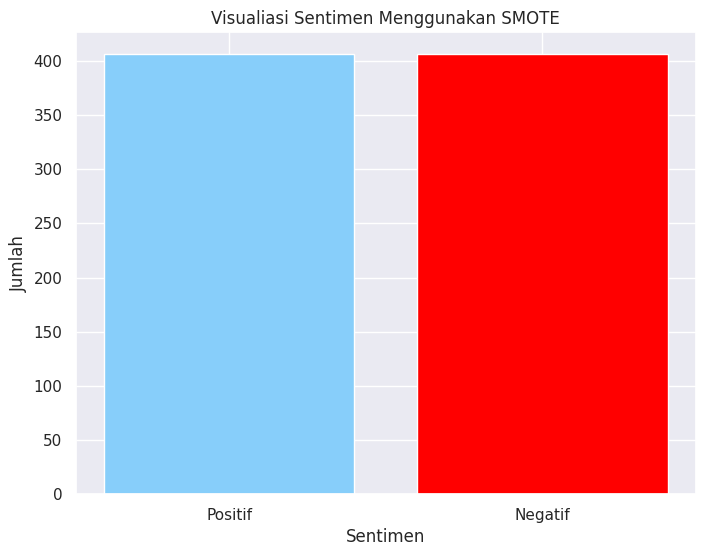

In [49]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [50]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [51]:
y_pred = naive_bayes.predict(X_test_vec)

In [52]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8362068965517241

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.39      0.47      0.42        15
     Positif       0.92      0.89      0.90       101

    accuracy                           0.84       116
   macro avg       0.65      0.68      0.66       116
weighted avg       0.85      0.84      0.84       116



# **Testing**


In [53]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : loginnya sangat susah
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [54]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus mudah untuk mendapat asset gratis
Hasil Analisis Sentimen Untuk Teks Baru : Positif
